<a href="https://colab.research.google.com/github/vanessaaleung/ds-case-studies/blob/master/financial-modeling/sharpe-ratio/sharpe_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

stock_data = pd.read_csv('https://raw.githubusercontent.com/vanessaaleung/ds-case-studies/master/financial-modeling/sharpe-ratio/datasets/stock_data.csv', parse_dates=['Date'], index_col=['Date']).dropna()
benchmark_data = pd.read_csv('https://raw.githubusercontent.com/vanessaaleung/ds-case-studies/master/financial-modeling/sharpe-ratio/datasets/benchmark_data.csv', parse_dates=['Date'], index_col=['Date']) .dropna()

In [3]:
print('Stocks\n')
stock_data.info()
print(stock_data.head())

print('\nBenchmarks\n')
benchmark_data.info()
benchmark_data.head()

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
                Amazon    Facebook
Date                              
2016-01-04  636.989990  102.220001
2016-01-05  633.789978  102.730003
2016-01-06  632.650024  102.970001
2016-01-07  607.940002   97.919998
2016-01-08  607.049988   97.330002

Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


## 1. Daily prices for Amazon and Facebook

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902503
max,844.359985,133.279999


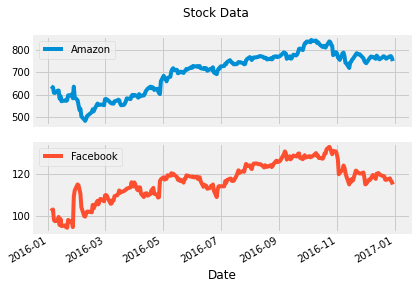

In [4]:
stock_data.plot(subplots=True, title='Stock Data')

stock_data.describe()

## 2. Visualize & summarize daily values for the S&P 500

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


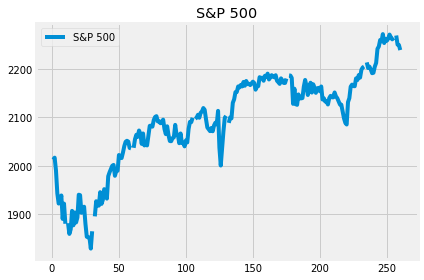

In [ ]:
benchmark_data.plot(title='S&P 500')

benchmark_data.describe()

## 3. Daily Stock Returns

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


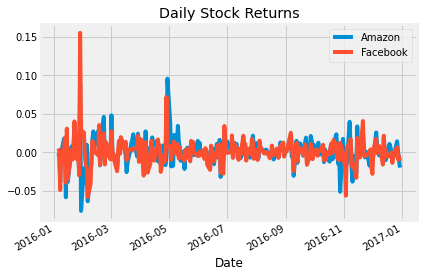

In [5]:
stock_returns = stock_data.pct_change()
stock_returns.plot(title='Daily Stock Returns')

stock_returns.describe()

## 4. Daily S&P 500 returns

count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

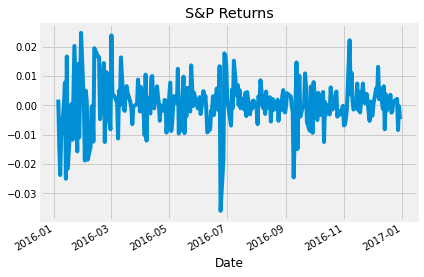

In [6]:
sp_returns = benchmark_data['S&P 500'].pct_change()
sp_returns.plot(title='S&P Returns')

sp_returns.describe()

## 5. Calculating Excess Returns for Amazon and Facebook vs. S&P 500

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


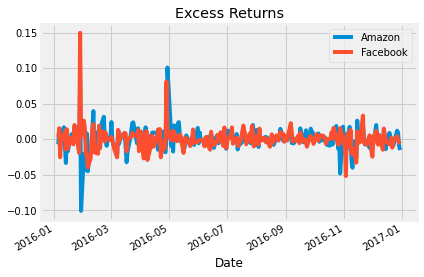

In [7]:
excess_returns = stock_returns.sub(sp_returns, axis=0)
excess_returns.plot(title="Excess Returns")

excess_returns.describe()

## 6. The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500
<p>Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the <code>excess_returns</code>. This tells us how much more or less the investment yields per day compared to the benchmark.</p>

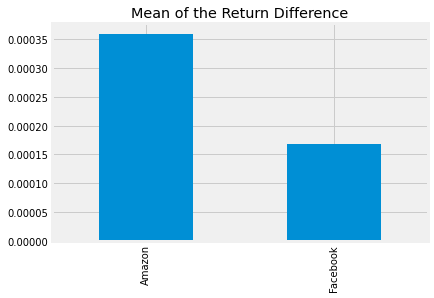

In [8]:
avg_excess_return = excess_returns.mean()
avg_excess_return.plot.bar(title='Mean of the Return Difference')

## 7. The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference
<p>It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.</p>
<p>Next, we calculate the standard deviation of the <code>excess_returns</code>. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&amp;P 500.</p>

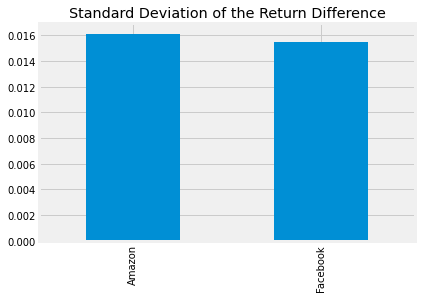

In [9]:
sd_excess_return = excess_returns.std()
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')

## 8. Putting it all together
<p>Now we just need to compute the ratio of <code>avg_excess_returns</code> and <code>sd_excess_returns</code>. The result is now finally the <em>Sharpe ratio</em> and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.</p>
<p>The Sharpe Ratio is often <em>annualized</em> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252</p>

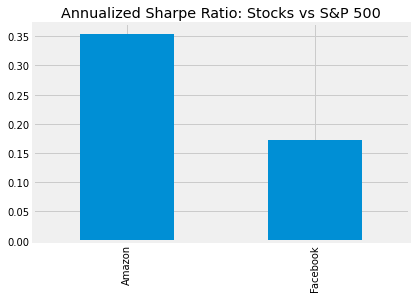

In [10]:
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs S&P 500')

## 9. Conclusion
<p>Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&amp;P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.</p>
<p>This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon. </p>
<p>When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.</p>